## Import necessary packages

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

In [2]:
import pandas as pd
import numpy as np
import sklearn as skl

import cyclum.tuning
import cyclum.models
from cyclum import writer

from cyclum.hdfrw import hdf2mat, mat2hdf

Using TensorFlow backend.


In [3]:
df = hdf2mat('/home/shaoheng/Documents/data/hESC-droplet/GSE125416/GSM357649-nonorm.h5')

In [4]:
model = cyclum.tuning.CyclumAutoTune(df.values, max_linear_dims=3, 
                                     epochs=100, rate=2e-4, verbose=20,
                                     encoder_width=[30, 20])

Auto tuning number of linear components...
Performing PCA...
Training Autoencoder with...
    0 linear dimensions...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


epoch: 20/100, loss:  0.4309, time elapsed:  86.73s, time left:  346.94s
epoch: 40/100, loss:  0.4291, time elapsed:  148.42s, time left:  222.63s
epoch: 60/100, loss:  0.4285, time elapsed:  212.67s, time left:  141.78s
epoch: 80/100, loss:  0.4282, time elapsed:  275.15s, time left:  68.79s
epoch: 100/100, loss:  0.4280, time elapsed:  341.47s, time left:  0.00s
[0.4279939148100459]
[0.42400469188709644, 0.4196193649856232, 0.41715386540051846, 0.4150683944238573]
    1 linear dimensions...
epoch: 20/100, loss:  0.4209, time elapsed:  64.39s, time left:  257.54s
epoch: 40/100, loss:  0.4208, time elapsed:  129.97s, time left:  194.95s
epoch: 60/100, loss:  0.4207, time elapsed:  196.72s, time left:  131.15s
epoch: 80/100, loss:  0.4207, time elapsed:

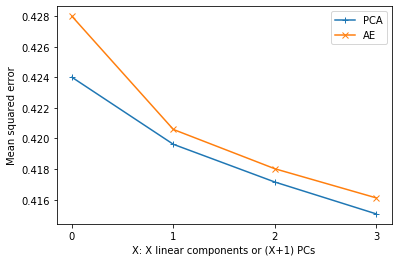

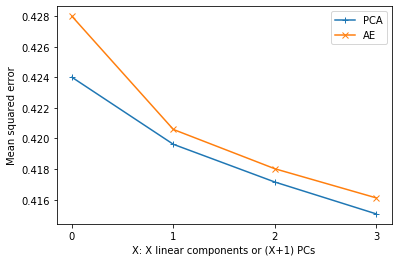

In [5]:
model.show_elbow()

In [6]:
model.train(df.values, epochs=300, rate=1e-4, verbose=30)

pseudotime = model.predict_pseudotime(df.values)

epoch: 30/300, loss:  0.4182, time elapsed:  100.03s, time left:  900.24s
epoch: 60/300, loss:  0.4179, time elapsed:  195.87s, time left:  783.48s
epoch: 90/300, loss:  0.4178, time elapsed:  300.24s, time left:  700.56s
epoch: 120/300, loss:  0.4177, time elapsed:  405.72s, time left:  608.58s
epoch: 150/300, loss:  0.4177, time elapsed:  497.66s, time left:  497.66s
epoch: 180/300, loss:  0.4177, time elapsed:  593.91s, time left:  395.94s
epoch: 210/300, loss:  0.4176, time elapsed:  690.00s, time left:  295.71s
epoch: 240/300, loss:  0.4176, time elapsed:  786.31s, time left:  196.58s
epoch: 270/300, loss:  0.4176, time elapsed:  882.97s, time left:  98.11s
epoch: 300/300, loss:  0.4176, time elapsed:  978.99s, time left:  0.00s


In [7]:
import pickle as pkl
with open('hESC.pkl', 'wb') as file:
    pkl.dump(pseudotime, file)

In [8]:
from cyclum.hdfrw import hdf2mat, mat2hdf
import pickle as pkl
with open('hESC.pkl', 'rb') as file:
    pseudotime = pkl.load(file)

mat2hdf(pseudotime, "/home/shaoheng/Documents/data/hESC-droplet/GSE125416/GSM357649-nonorm-pseudotime.h5")

